Assuming that there is a linear relationship between the size of the house and the price, it is a linear regression.

In [24]:
import pandas as pd
from loguru import logger

data = {'size': [1, 2, 3],
        'price': [1, 2, 3]}
df = pd.DataFrame(data)
logger.info(df)

2022-04-12 19:14:14.677 | INFO     | __main__:<module>:7 -    size  price
0     1      1
1     2      2
2     3      3


In [1]:

import seaborn as sns

sns.set_theme(color_codes=True)
sns.regplot(x="size", y="price", data=df);

NameError: name 'df' is not defined

<img src="../img/univariate/univariate_main_algorithm.png" width="750"/>

### The Hypothesis Function
Hypothesis is a function representing the relationship between input (feature) and output (target).
“How to express the relationship between variables and outputs with these and these functions? It is believed that they began to call it a hypothesis because it puts up a kind of hypothesis. Hypothesis can take the form of any function, but the following linear functions are often used.


<img src="../img/univariate/univariate_main_formulas.png" width="750"/>
<br>
<img src="../img/univariate/univariate_lr_hypotesis_visual.png" width="550"/>

### Cost function detailed explained

<img src="../img/univariate/univariate_lr_cost_function.png" width="750"/>

In [26]:
data = {'size': [1, 2, 3],
        'price': [1, 2, 3]}
df = pd.DataFrame(data)


#hypothesis implementation
def hypothesis(theta0, theta1, x):
    return theta0 + theta1 * x


#Cost function formula implementation
def cost_function(theta0, theta1, df):
    hypo_results = list(map(lambda x, y: (hypothesis(theta0, theta1, x) - y) ** 2, df["size"], df["price"]))
    cost_function_res = 1 / (2 * len(df["price"])) * sum(hypo_results)
    logger.info(
        "For theta1 = %.2f, cost function is = %.2f, hypothesis = %s" % (theta1, cost_function_res, hypo_results))
    return cost_function_res


thetas1 = [1, 0.5, 0]

for t1 in thetas1:
    cost_function(0, t1, df)


2022-04-12 19:14:22.158 | INFO     | __main__:cost_function:15 - For theta1 = 1.00, cost function is = 0.00, hypothesis = [0, 0, 0]
2022-04-12 19:14:22.159 | INFO     | __main__:cost_function:15 - For theta1 = 0.50, cost function is = 0.58, hypothesis = [0.25, 1.0, 2.25]
2022-04-12 19:14:22.160 | INFO     | __main__:cost_function:15 - For theta1 = 0.00, cost function is = 2.33, hypothesis = [1, 4, 9]


## How to use matrices multiplication for the **linear regression** implementation

In [27]:
import pandas as pd
import numpy as np

'''
https://numpy.org/doc/1.21/
https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
'''
#appartment square meters and price
df = pd.DataFrame({'size': [47, 53, 67, 90],
                   'price': [84, 87, 99, 115]})
#prepare matrix with apartment size
house_size_matrix = np.array(list(map(lambda s: [1, s], df['size'])))
print("house size matrix representation\n", house_size_matrix)

#prepare theta0 and theta1 vectors
thetas_vector1 = np.array([[55],
                           [0.6]])
print("theta0 and theta1 vector\n", thetas_vector1)

#provide prediction results for the prices with hypothesis function by matrix and vector multiplication
predictions_by_hypothesis = np.zeros(len(df['size']))
for i in range(len(df['size'])):
    for j in range(2):
        print(house_size_matrix[i][j], "*", thetas_vector1[j][0])
        predictions_by_hypothesis[i] += thetas_vector1[j][0] * house_size_matrix[i][j]

print("prices predicted with vector  =", predictions_by_hypothesis)
print("real prices =", list(df["price"]))

# Calculate cost function for predictions by hypothesis
hypo_results = list(map(lambda x, y: (x - y) ** 2, predictions_by_hypothesis, df["price"]))
cost_function_res = 1 / (2 * len(df["price"])) * sum(hypo_results)
print("cost function results based on  matrix implementation =", cost_function_res)

house size matrix representation
 [[ 1 47]
 [ 1 53]
 [ 1 67]
 [ 1 90]]
theta0 and theta1 vector
 [[55. ]
 [ 0.6]]
1 * 55.0
47 * 0.6
1 * 55.0
53 * 0.6
1 * 55.0
67 * 0.6
1 * 55.0
90 * 0.6
prices predicted with vector  = [ 83.2  86.8  95.2 109. ]
real prices = [84, 87, 99, 115]
cost function results based on  matrix implementation = 6.39000000000001


In [28]:
# Compare results with previous cost function implementation
cost_function_res_above = cost_function(thetas_vector1[0], thetas_vector1[1], df)
print("cost function results based on function implementation =", cost_function_res_above)

2022-04-12 19:14:25.462 | INFO     | __main__:cost_function:15 - For theta1 = 0.60, cost function is = 6.39, hypothesis = [array([0.64]), array([0.04]), array([14.44]), array([36.])]


cost function results based on function implementation = [6.39]


<AxesSubplot:xlabel='size', ylabel='price'>

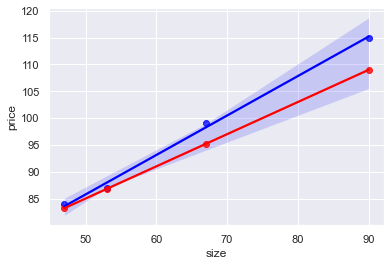

In [29]:
import seaborn as sns

df_predicted = pd.DataFrame({'size': df['size'],
                             'price': predictions_by_hypothesis})

sns.regplot(x="size", y="price", color="blue", data=df)
sns.regplot(x="size", y="price", color="red", data=df_predicted)

In [30]:
# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression

linr = LinearRegression()
linr.fit(df['size'].values.reshape(-1, 1), df['price'].values.reshape(-1, 1))
print(linr.intercept_, linr.coef_[0])
print(linr.score(df['size'].values.reshape(-1, 1), df['price'].values.reshape(-1, 1)))

[48.96117835] [0.73601279]
0.997128716568367
